# Twitter Text Report
## Brody Coyne
### 10/25/2022

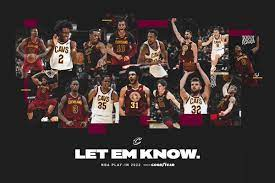

By creating a Twitter developer account and using their API, I was able to gather hundreds of tweets to look at the public sentiment around the Cleveland Cavaliers basketball team. Since the NBA is relatively global I wanted to focus the report on looking at the different languages that people spoke who were tweeting about the Cavs. I know that the global market is pretty large in the NBA as a whole. The Cavs specifically have a very good and well known Spanish broadcaster named [Rafael "Rafa" Hernandez-Brito](https://www.news5cleveland.com/news/local-news/meet-the-spanish-voice-of-the-cavaliers-championing-the-team-and-the-latin-community). This shows the significance of the Spanish speaking audience and non-English speaking audience as a whole.

In [144]:
import pandas as pd
import json
import requests
import urllib

In order to access Twitter's API I had to get Authorization from Twitter and I was able to do that by gathering the bearer token and running it through my code.

In [145]:
bearer_token = pd.read_csv("bearer922-01.txt", header = 0, sep = '\t')

In [146]:
header = {'Authorization':'Bearer {}'.format(bearer_token['Bearer_Token'].iloc[0])}

Next, I created a query to limit the tweets I collected to be about the Cavs by using keywords and hashtags. I also wanted to collect information relating to the specific tweets so I used "user_fields" and "tweet_fields" to find aspects of the tweet like the author ID, creation time, and language.

In [147]:
endpoint = 'https://api.twitter.com/2/tweets/search/recent'

In [148]:
query_param = urllib.parse.quote('from:Cavs OR(Cleveland Cavs OR Cleveland Cavaliers OR Cleveland Basketball OR #LetEmKnow)')

In [149]:
user_fields = 'username,name'

In [150]:
tweet_fields = 'author_id,public_metrics,created_at,lang'

In [151]:
expansions = 'entities.mentions.username'

In [152]:
query_url = endpoint + '?query={}&user.fields={}&tweet.fields={}&expansions={}'.format(query_param,user_fields,tweet_fields,expansions)

In [153]:
query_url

'https://api.twitter.com/2/tweets/search/recent?query=from%3ACavs%20OR%28Cleveland%20Cavs%20OR%20Cleveland%20Cavaliers%20OR%20Cleveland%20Basketball%20OR%20%23LetEmKnow%29&user.fields=username,name&tweet.fields=author_id,public_metrics,created_at,lang&expansions=entities.mentions.username'

I then created the variable response which gathers all of the twitter data by combining the endpoint, query, user_fields, tweet_fields, and expansions.

In [154]:
response = requests.get(query_url, headers = header)

In [155]:
response

<Response [200]>

In [157]:
response_dict = json.loads(response.text)

After checking the tweets I collected to see if the right type of tweets were returned, I created a DataFrame using pandas to store all of the tweets.

In [158]:
response_df = pd.DataFrame(response_dict['data'])
response_df2 = response_df

In [159]:
response_df.head()

,lang,created_at,edit_history_tweet_ids,author_id,public_metrics,entities,id,text
0,en,2022-10-25T20:23:55.000Z,[1585004249032708096],2302471952,"{'retweet_count': 46, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",1585004249032708096,RT @SLAMonline: The Cavs have bought into the ...
1,en,2022-10-25T20:23:29.000Z,[1585004140597751808],576796855,"{'retweet_count': 46, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",1585004140597751808,RT @SLAMonline: The Cavs have bought into the ...
2,qme,2022-10-25T20:23:03.000Z,[1585004029956214784],1463275784290799616,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,1585004029956214784,#LetEmKnow https://t.co/JzoOyCuWEj
3,en,2022-10-25T20:22:46.000Z,[1585003958413987840],1559040796048773120,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 3, 'end': 15, 'usernam...",1585003958413987840,RT @pollonpreps: Faith Baptist boys basketball...
4,fr,2022-10-25T20:21:59.000Z,[1585003760547663872],1226138554268553216,"{'retweet_count': 67, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 11, 'usernam...",1585003760547663872,RT @CavsFRA: Il y a 6 ans jour pour jour... Un...


I noticed that public_metrics has data about the retweets, replies, and likes so I pulled out that data to show it in a table.

In [160]:
public_metrics_df = pd.DataFrame(list(response_df['public_metrics']))

In [161]:
public_metrics_df

,retweet_count,reply_count,like_count,quote_count
0,46,0,0,0
1,46,0,0,0
2,0,0,0,0
3,1,0,0,0
4,67,0,0,0
5,6,0,0,0
6,6,0,0,0
7,46,0,0,0
8,15,0,0,0
9,46,0,0,0


Because I was only getting back 10 tweets at a time I needed to create a function to collect more tweets. I decided to run the function 50 times which allowed me to collect 500 tweets to analyze.

In [162]:
def twt_recent_search (query, num_pages, header):
    response_list = []
    next_token = ''
    for i in range(0, num_pages):
        if i > 0:
            this_query = query + "&next_token={}".format(next_token)
        else:
            this_query = query
        
        this_response = requests.get(this_query, headers = header)
        this_response_dict = json.loads(this_response.text)
        response_list.append(this_response_dict)
        next_token = this_response_dict['meta']['next_token']
        
    return response_list

In [163]:
my_responses = twt_recent_search(query_url, 50, header)

I then decided to reorganize my DataFrame to make the responses make more sense.

In [164]:
results_1 = pd.DataFrame.from_records(my_responses)

In [165]:
data_list = list(results_1['data'])

In [166]:
data_list_of_dfs = [pd.DataFrame(x) for x in data_list]

In [167]:
data_df = pd.concat(data_list_of_dfs)

In [168]:
data_df.head()

,lang,public_metrics,entities,id,text,created_at,author_id,edit_history_tweet_ids
0,en,"{'retweet_count': 46, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",1585004249032708096,RT @SLAMonline: The Cavs have bought into the ...,2022-10-25T20:23:55.000Z,2302471952,[1585004249032708096]
1,en,"{'retweet_count': 46, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",1585004140597751808,RT @SLAMonline: The Cavs have bought into the ...,2022-10-25T20:23:29.000Z,576796855,[1585004140597751808]
2,qme,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,1585004029956214784,#LetEmKnow https://t.co/JzoOyCuWEj,2022-10-25T20:23:03.000Z,1463275784290799616,[1585004029956214784]
3,en,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 3, 'end': 15, 'usernam...",1585003958413987840,RT @pollonpreps: Faith Baptist boys basketball...,2022-10-25T20:22:46.000Z,1559040796048773120,[1585003958413987840]
4,fr,"{'retweet_count': 67, 'reply_count': 0, 'like_...","{'mentions': [{'start': 3, 'end': 11, 'usernam...",1585003760547663872,RT @CavsFRA: Il y a 6 ans jour pour jour... Un...,2022-10-25T20:21:59.000Z,1226138554268553216,[1585003760547663872]


I checked to see if the function ran as intended and if my query was broad enough to collect enough data. I intended to collect 500 tweets and it did collect 500 tweets.

In [169]:
len(data_df.index)

500

Due to focusing on the different languages that people spoke who tweeted about the Cavs, I wanted to sort by the languages to see all of the different ones. Unsurprisingly, English was the most popular language spoke. However, I was a bit surprised that French and Japanese were the next most popular languages. I would have expected that Spanish would have been second but it was all the way at 8. 

In [170]:
data_df.groupby('lang').count().sort_values('author_id', ascending=False)

,public_metrics,entities,id,text,created_at,author_id,edit_history_tweet_ids
lang,,,,,,,
en,347,256,347,347,347,347,347
fr,67,65,67,67,67,67,67
ja,24,7,24,24,24,24,24
qme,14,11,14,14,14,14,14
qht,11,6,11,11,11,11,11
pt,9,3,9,9,9,9,9
und,9,7,9,9,9,9,9
es,8,4,8,8,8,8,8
tr,5,5,5,5,5,5,5


I saved all of the tweets in a csv file so that the I save all of the tweets that I collect at a specific time. This means that when I rerun the code it will not change the first set of tweets that I collected.

In [172]:
data_df.to_csv('cavstwitterdata1.csv', encoding = 'utf-8')

In [173]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data_df.to_csv('out.zip', index=False,
          compression=compression_opts)

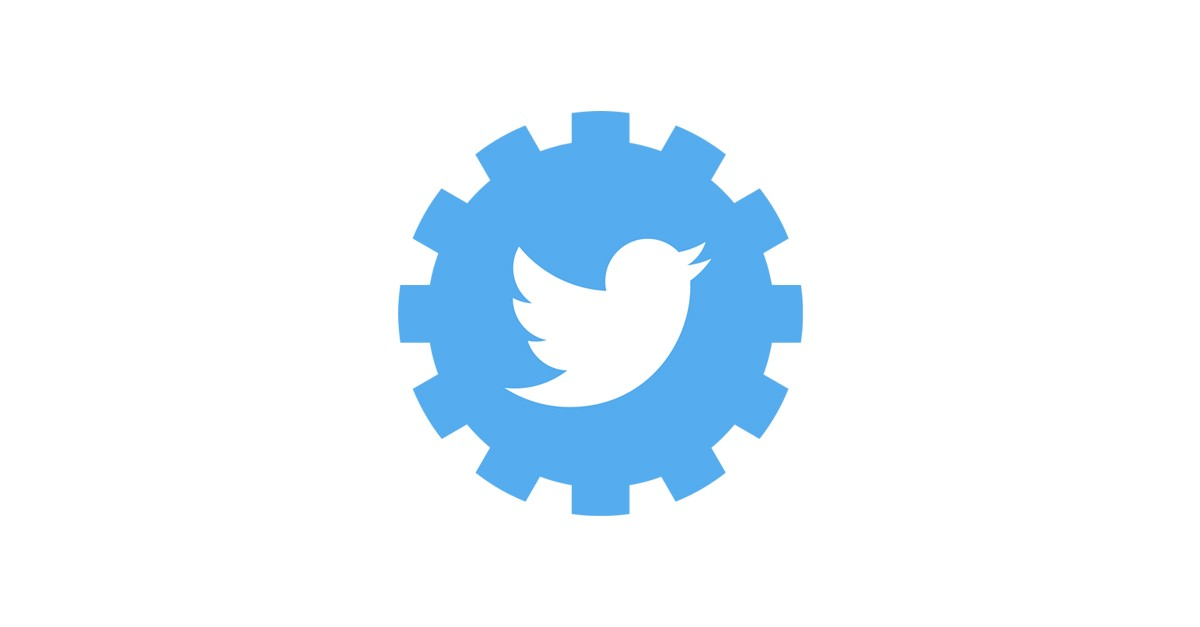

After looking through all of the tweets I collected. I noticed that a lot of the tweets are retweets which causes a lot of repeats. While including retweets can obviously be a good way to look at the data because retweets are still interactions. If I could update this project in any way I would probably want to look at the data without retweets so I can only focus on collecting tweets individual people wrote.

Overall, this project helped to to understand the overall sentiment around the Cleveland Cavaliers during the beginning of the season. I was also able to see the many different languages that people who discussed the Cavs spoke. The data I collected is a good starting point and I can use this data to analyze many more different aspects about tweets about the Cavs.